# **Data Diri**


*   NIM = 2241720056
*   Nama = Dhika Wahyu Nugroho
*   Kelas = 3F
*   No Absen = 06




# **Tugas**

Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'

2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

4. Buatlah  implementasi model SOM untuk segmentasi citra lain

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# **K-Means**

In [43]:
df = pd.read_csv('/content/drive/MyDrive/Machine_Learning/Jobsheet 7/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [44]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

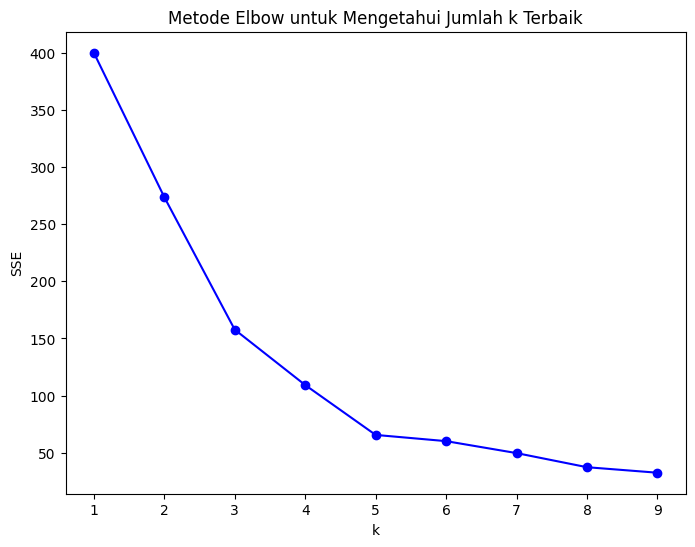

In [45]:
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('k')
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

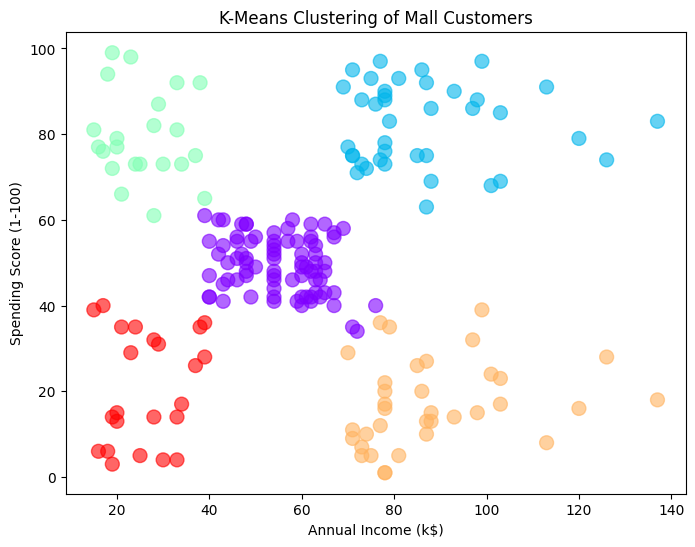

In [46]:
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['Cluster'], s=100, cmap='rainbow', alpha=0.6)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering of Mall Customers')
plt.show()

# **Model SOM Untuk Segmentasi Citra Lain**

In [47]:
pip install minisom

In [48]:
from skimage import io

In [49]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [58]:
galaxy_path = "/content/drive/MyDrive/Machine_Learning/Jobsheet 7/galaxy.jpg"
galaxy = io.imread(galaxy_path) / 255.0

In [59]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(galaxy, num_epochs, initial_learning_rate, initial_neighborhood_radius)

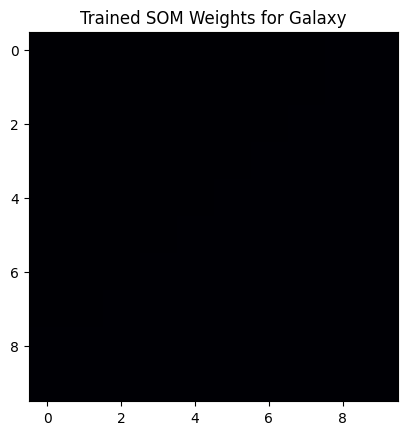

In [61]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Galaxy')
plt.show()